# Student MArk Prediction Based On Study Hour

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

In [2]:
ds = pd.read_csv(r'C:\Users\USER\Desktop\capstone project\Student Mark Prediction\student_info.csv')
ds.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


## Discover and visualize the data to gain insights

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [4]:
ds.shape

(200, 2)

In [5]:
ds.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


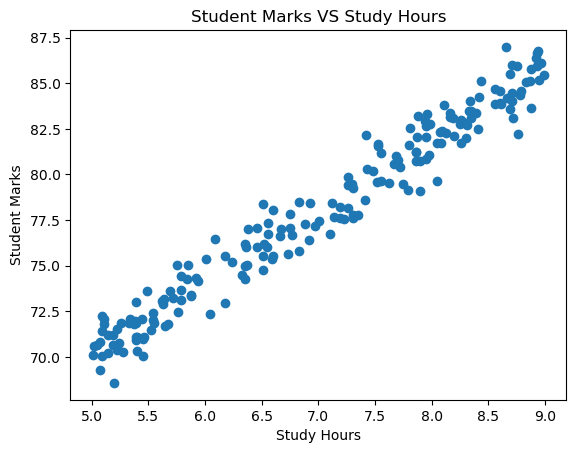

In [6]:
plt.scatter(x = ds.study_hours, y = ds.student_marks)
plt.xlabel('Study Hours')
plt.ylabel('Student Marks')
plt.title('Student Marks VS Study Hours')
plt.show()

## EDA

In [7]:
# Data Claning

In [8]:
ds.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [9]:
ds.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [10]:
ds2 = ds.fillna(ds.mean())

In [11]:
ds2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [12]:
ds2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


## Split data

In [13]:
y = ds2.drop('study_hours', axis = 1)
x = ds2.drop('student_marks', axis = 1)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [15]:
# Train Model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [16]:
# predict
y_pred = regressor.predict(x_test)

In [17]:
regressor.predict([[5]])[0][0]

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.10250100162845

In [18]:
pd.DataFrame(np.c_[x_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.410000,82.50,83.505073
1,5.190000,71.18,70.849272
2,5.720000,73.25,72.932370
3,8.880000,83.64,85.352348
4,5.790000,73.64,73.207496
5,8.660000,86.99,84.487666
6,7.550000,81.18,80.124952
7,7.990000,82.75,81.854316
8,7.750000,79.50,80.911027
9,8.080000,81.70,82.208050


In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE :', mae)
print('MSE :', mse)
print('r2_score :', r2)

MAE : 0.8574561538746253
MSE : 1.0443968573561397
r2_score : 0.9521841793508594


In [20]:
regressor.score(x_test, y_test)

0.9521841793508594

## PKL file useing joblib

In [21]:
joblib.dump(regressor, 'Student_mark_prediction.pkl')

['Student_mark_prediction.pkl']